In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
import time

In [2]:
from ema_workbench import (Model, RealParameter, ScalarOutcome, MultiprocessingEvaluator, 
                           ema_logging, Constant, Scenario, Policy, perform_experiments)
from ema_workbench import load_results
from ema_workbench.analysis import prim, dimensional_stacking, cart
from ema_workbench.util import ema_logging, utilities

from SALib.analyze import sobol
from ema_workbench.em_framework.evaluators import Samplers # 
from ema_workbench.em_framework.salib_samplers import get_SALib_problem

ema_logging.log_to_stderr(ema_logging.INFO)

<Logger EMA (DEBUG)>

In [3]:
from dike_model_function import DikeNetwork  # @UnresolvedImport
from problem_formulation import get_model_for_problem_formulation

dike_model,  planning_steps = get_model_for_problem_formulation(4) 

In [4]:
policies = [Policy("base case without policy", **{k.name: 0 for k in dike_model.levers})]
problem = get_SALib_problem(dike_model.uncertainties)
print(problem)

{'num_vars': 19, 'names': ['A.0_ID flood wave shape', 'A.1_Bmax', 'A.1_Brate', 'A.1_pfail', 'A.2_Bmax', 'A.2_Brate', 'A.2_pfail', 'A.3_Bmax', 'A.3_Brate', 'A.3_pfail', 'A.4_Bmax', 'A.4_Brate', 'A.4_pfail', 'A.5_Bmax', 'A.5_Brate', 'A.5_pfail', 'discount rate 0', 'discount rate 1', 'discount rate 2'], 'bounds': [(0, 133), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (30, 350), (0, 3), (0, 1), (0, 4), (0, 4), (0, 4)]}


In [5]:
with MultiprocessingEvaluator(dike_model) as evaluator:
    sobol_results = evaluator.perform_experiments(scenarios=10, policies = policies,
                                               uncertainty_sampling=Samplers.SOBOL)
    
experiments, outcomes = sobol_results


[MainProcess/INFO] pool started with 8 workers
/opt/anaconda3/lib/python3.9/site-packages/SALib/sample/saltelli.py:94: UserWarning: 
        Convergence properties of the Sobol' sequence is only valid if
        `N` (10) is equal to `2^n`.
        
  warnings.warn(msg)
[MainProcess/INFO] performing 400 scenarios * 1 policies * 1 model(s) = 400 experiments
  0%|                                          | 1/400 [00:02<14:00,  2.11s/it]Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/ema_workbench/em_framework/callbacks.py", line 246, in _store_outcomes
    self.results[outcome][case_id,] = outcome_res
KeyError: 'Dike Investment Costs 0'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.9/site-packages/ema_workbench/em_framework/ema_multiprocessing.py", line 253, in run
    self.callback(*result.get())
  File "/opt/anaconda3/lib/python3.9/site-packages/ema_workben

In [16]:
Si_Damage = sobol.analyze(problem, outcomes['Expected Annual Damage 0'],
                  calc_second_order=True, print_to_console=False)

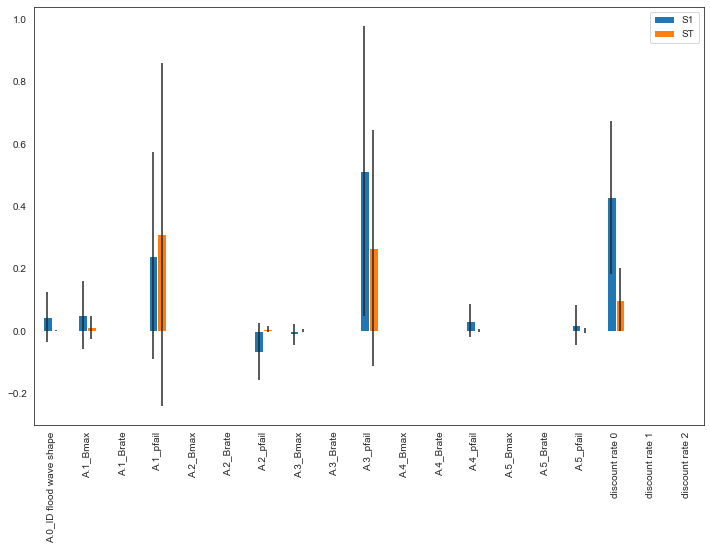

In [18]:
scores_filtered = {k: Si_Damage[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_Damage_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_Damage_df[["S1", "ST"]]
err = Si_Damage_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(12, 10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [21]:
Si_Costs = sobol.analyze(problem, outcomes['Dike Investment Costs 0'],
                  calc_second_order=True, print_to_console=False)

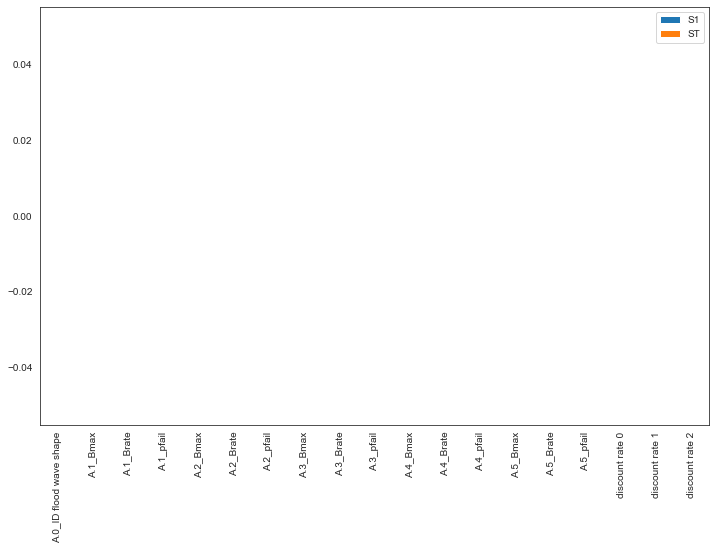

In [22]:
scores_filtered = {k: Si_Costs[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_Costs_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_Costs_df[["S1", "ST"]]
err = Si_Costs_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(12, 10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [43]:
Si_Deaths = sobol.analyze(problem, outcomes['Expected Number of Deaths 1'],
                  calc_second_order=True, print_to_console=False)

In [45]:
Si_Deaths

{'S1': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'S1_conf': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'ST': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'ST_conf': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'S2': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan

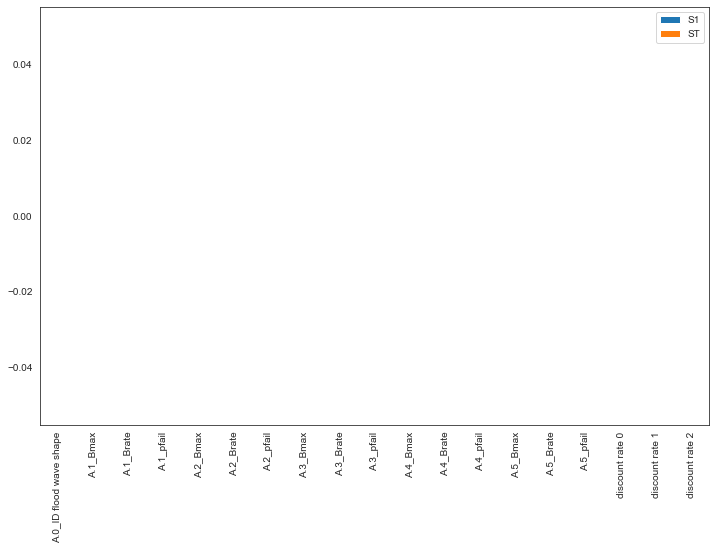

In [30]:
scores_filtered = {k: Si_Deaths[k] for k in ["ST", "ST_conf", "S1", "S1_conf"]}
Si_Deaths_df = pd.DataFrame(scores_filtered, index=problem["names"])

sns.set_style("white")
fig, ax = plt.subplots(1)

indices = Si_Deaths_df[["S1", "ST"]]
err = Si_Deaths_df[["S1_conf", "ST_conf"]]

indices.plot.bar(yerr=err.values.T, ax=ax)
fig.set_size_inches(12, 10)
fig.subplots_adjust(bottom=0.3)
plt.show()

In [13]:
scores_filtered

{'ST': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'ST_conf': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'S1': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan]),
 'S1_conf': array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan])}

In [14]:
Si_df

NameError: name 'Si_df' is not defined

In [ ]:
utilities.save_results(sobol_results, 'results/base_case_sobol_lever.csv')

In [ ]:
# sobol_results=utilities.load_results('results/base_case_sobol_lever.csv')
# experiments, outcomes = sobol_results
# outcomes = pd.DataFrame(outcomes)
# experiments = pd.DataFrame(experiments)

In [ ]:
outcomes


In [ ]:
experiments

In [ ]:
from SALib.analyze.sobol import analyze

In [ ]:
sobol_results = {}
for policy in experiments.policy.unique():
    logical = experiments.policy == policy
    y = outcomes['Expected Number of Deaths'][logical]
    indices = analyze(problem, y)
    sobol_results[policy] = indices

In [ ]:
indices

In [ ]:
plt.hist(y)
plt.show()

In [ ]:
from ema_workbench.analysis import feature_scoring

In [ ]:
cleaned_experiments = experiments.drop(columns=[l.name for l in dike_model.levers])

scores = feature_scoring.get_feature_scores_all(cleaned_experiments,sobol_results)